# Link for kaggle submittion: 

https://www.kaggle.com/code/avichaiiluz/notebook5a0c986c70

In [1615]:
import pandas as pd 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

Data Handling

In [1616]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [1617]:
train_data.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
test_data.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)

In [1618]:
X_train = train_data.drop(["Survived"],axis="columns")
Y_train = train_data["Survived"]

In [1619]:
X_train.Sex = X_train.Sex.map({"male":0,"female":1})
test_data.Sex = test_data.Sex.map({"male":0,"female":1})

In [1620]:
X_train.Age = X_train.Age.fillna(X_train.Age.mean())
test_data.Age = test_data.Age.fillna(test_data.Age.mean())

In [1621]:
test_data

,Pclass,Sex,Age
0,3,0,34.50000
1,3,1,47.00000
2,2,0,62.00000
3,3,0,27.00000
4,3,1,22.00000
...,...,...,...
413,3,0,30.27259
414,1,1,39.00000
415,3,0,38.50000
416,3,0,30.27259


In [1622]:
X_train,X_test,Y_train,Y_real=train_test_split(X_train,Y_train,train_size = 0.8)
len(X_train)

712

In [1623]:
X_train

,Pclass,Sex,Age
50,3,0,7.000000
233,3,1,5.000000
461,3,0,34.000000
223,3,0,29.699118
316,2,1,24.000000
...,...,...,...
696,3,0,44.000000
202,3,0,34.000000
876,3,0,20.000000
400,3,0,39.000000


# Data Analysis using Decision Tree


In [1624]:
model_dt = tree.DecisionTreeClassifier(max_depth=4)
model_dt

DecisionTreeClassifier(max_depth=4)

In [1625]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [1626]:
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

 ## Decision Tree - Performance Measurement

#### a) Accuracy

In [1627]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_dt = model_dt.score(X_test,Y_real)  
print(accuracy_dt)

0.7932960893854749


In [1628]:
# Here is another way to find the accuracy score
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)  
accuracy

0.7932960893854749

#### b) Precision

In [1629]:
# Precision = true positive / true positive + false positive
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
precision_dt

0.734375

#### c) Recall

In [1630]:
# Recall = true positive / true positive + false negative
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)  
recall_dt

0.7014925373134329

#### d) Confusion matrix

In [1631]:
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[95, 17],
       [20, 47]], dtype=int64)

<Axes: >

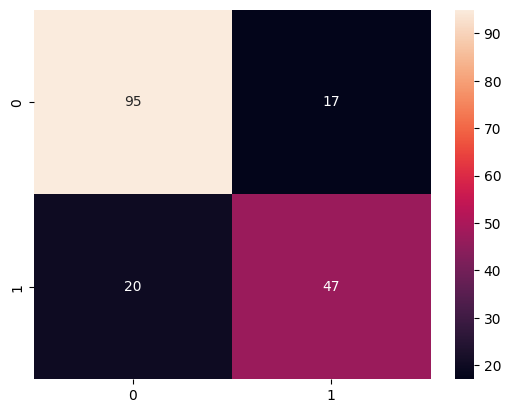

In [1632]:
# 0,0: 53 => True Negative
# 0,1: 0  => False Positive 
# 1,0: 23 => False Negative 
# 1,1: 4  => True Positive 
sns.heatmap(confusion_matrix_dt, annot=True)

In [1633]:
# Y_test_pred = model_dt.predict(test_data)
Y_test_pred = model_rf.predict(test_data)
Y_test_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1634]:
# Create a submission DataFrame
test_data_CSV=pd.read_csv("test.csv")

submission = pd.DataFrame({'PassengerId': test_data_CSV['PassengerId'], 'Survived': Y_test_pred})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


c:\Users\Avichai Iluz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Avichai Iluz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Avichai Iluz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


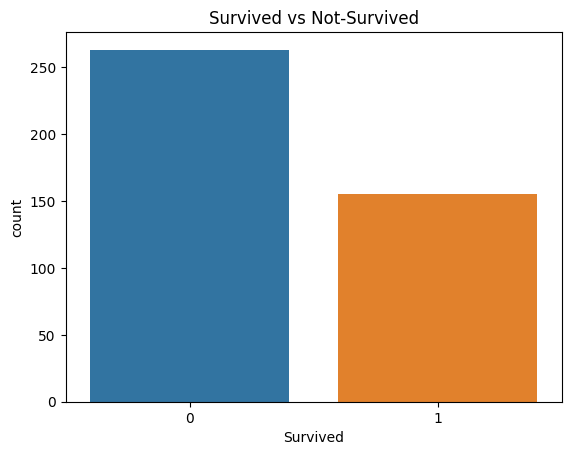

In [1635]:
# 1. Count of Survived vs. Not-Survived
sns.countplot(x='Survived', data=submission)
plt.title('Survived vs Not-Survived')
plt.show()